In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

plt.style.use("ggplot")

%matplotlib inline

## Random Selection

In [72]:
def random_selection(array, number):
    length = len(array)
    
    if length <= 1:
        return array[0]
    
    if length == 2:
        if array[0] > array[1]:
            return [array[1], array[0]][number-1]
        else:
            return array[number-1]
        
    else:
        pivot = np.random.randint(0, length)
        small = []
        large = []
        
        for element in array:
            if element < array[pivot]:
                small.append(element)
            elif element > array[pivot]:
                large.append(element)

        if len(small) == number-1:
            return array[pivot]
        if len(small) < number-1:
            return random_selection(large, number-len(small)-1)
        if len(small) >= number:
            return random_selection(small, number)

## Insertion Sort

In [74]:
def insertion_sort(array):
    for j in range(1, len(array)):
        key = array[j]
        i = j - 1
        while i >= 0 and array[i] > key:
            array[i+1] = array[i]
            i -= 1
        array[i+1] = key
    return array

## Deterministic Selection

In [149]:
def selection(array, number):

    length = len(array)

    if length <= 1:
        return array[0]
    
    if length == 2:
        if array[0] > array[1]:
            return [array[1], array[0]][number-1]
        else:
            return array[number-1]  
        
    else:
        medians = []

        for i in range(1, length//5+1):
            medians.append(insertion_sort(array[(i*5-5):(i*5)])[2])
        if length%5 == 1:
            medians.append(array[0])
        elif length%5 == 2:
            if array[0] > array[1]:
                medians.append(array[0])
            else:
                medians.append(array[1])
        elif length%5 > 2:
            medians.append(insertion_sort(array[-(length%5):])[length%5//2])
            
        pivot_value = selection(medians, len(medians)//2)
        
        small = []
        large = []
        
        for element in array:
            if element < pivot_value:
                small.append(element)
            elif element > pivot_value:
                large.append(element)

        if len(small) == number-1:
            return pivot_value
        if len(small) < number-1:
            return selection(large, number-len(small)-1)
        if len(small) >= number:
            return selection(small, number)
    

## Quick Sort

In [169]:
def quick_sort(array):
    length = len(array)
    
    if length <= 1:
        return array
    
    if length == 2:
        if array[0] > array[1]:
            return [array[1], array[0]]
        else:
            return array
        
    else:
        pivot = np.random.randint(0, length)
        small = []
        large = []
        
        for element in array:
            if element < array[pivot]:
                small.append(element)
            elif element > array[pivot]:
                large.append(element)
                
        if not small:
            return [array[pivot]] + quick_sort(large)
        elif not large:
            return quick_sort(small) + [array[pivot]]
        else:
            return quick_sort(small) + [array[pivot]] + quick_sort(large)

## Performance Check

In [172]:
time_list = []
for i in range(2, 15):
    Z = np.random.rand(2**i)
    statistic = np.random.randint(0, 2**i)
    
    start_time = time.time()
    insertion_sort(Z)
    insertion = time.time() - start_time
    
    start_time = time.time()
    quick_sort(Z)
    quick = time.time() - start_time    

    start_time = time.time()
    random_selection(Z, statistic)
    random_select = time.time() - start_time    

    
    start_time = time.time()
    selection(Z, statistic)
    select = time.time() - start_time    
    
    time_list.append([insertion, quick, random_select, select])
    print("i={}: completed".format(i))

i=2: completed
i=3: completed
i=4: completed
i=5: completed
i=6: completed
i=7: completed
i=8: completed
i=9: completed
i=10: completed
i=11: completed
i=12: completed
i=13: completed
i=14: completed


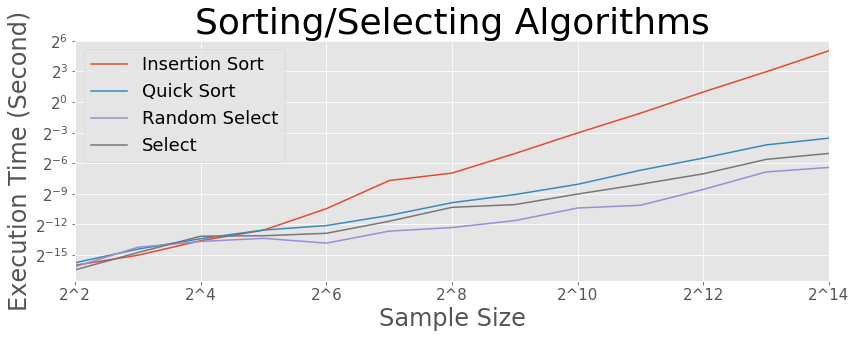

In [174]:
time_df = pd.DataFrame(time_list, index=range(2, 15), columns=["insertion", "quick", "random_select", "select"])
time_df.plot(figsize=(12, 4.8))

plt.title("Sorting/Selecting Algorithms", fontsize=36)
plt.legend(["Insertion Sort", "Quick Sort", "Random Select", "Select"], fontsize=18)
plt.xlabel("Sample Size", fontsize = 24)
plt.xticks(np.arange(2, 15, 2), labels = ["2^{}".format(i) for i in range(2, 15, 2)], fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log", basey=2)
plt.ylabel("Execution Time (Second)", fontsize = 24)
plt.tight_layout()
plt.savefig("image/selection.png")
plt.show()